In [91]:
# import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

pd.set_option("display.max_columns", 999)
pd.get_option("display.max_columns")

pd.set_option("display.max_rows", 999)
pd.get_option("display.max_rows")

999

In [92]:
#Credit Card Balances
bureau = pd.read_csv('bureau.csv')

In [93]:
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [94]:
bureau.shape

(1716428, 17)

In [95]:
bureau.describe()

,SK_ID_CURR,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
count,1.716428e+06,1.716428e+06,1.716428e+06,1.716428e+06,1.610875e+06,1.082775e+06,5.919400e+05,1.716428e+06,1.716415e+06,1.458759e+06,1.124648e+06,1.716428e+06,1.716428e+06,4.896370e+05
mean,2.782149e+05,5.924434e+06,-1.142108e+03,8.181666e-01,5.105174e+02,-1.017437e+03,3.825418e+03,6.410406e-03,3.549946e+05,1.370851e+05,6.229515e+03,3.791276e+01,-5.937483e+02,1.571276e+04
std,1.029386e+05,5.322657e+05,7.951649e+02,3.654443e+01,4.994220e+03,7.140106e+02,2.060316e+05,9.622391e-02,1.149811e+06,6.774011e+05,4.503203e+04,5.937650e+03,7.207473e+02,3.258269e+05
min,1.000010e+05,5.000000e+06,-2.922000e+03,0.000000e+00,-4.206000e+04,-4.202300e+04,0.000000e+00,0.000000e+00,0.000000e+00,-4.705600e+06,-5.864061e+05,0.000000e+00,-4.194700e+04,0.000000e+00
25%,1.888668e+05,5.463954e+06,-1.666000e+03,0.000000e+00,-1.138000e+03,-1.489000e+03,0.000000e+00,0.000000e+00,5.130000e+04,0.000000e+00,0.000000e+00,0.000000e+00,-9.080000e+02,0.000000e+00
50%,2.780550e+05,5.926304e+06,-9.870000e+02,0.000000e+00,-3.300000e+02,-8.970000e+02,0.000000e+00,0.000000e+00,1.255185e+05,0.000000e+00,0.000000e+00,0.000000e+00,-3.950000e+02,0.000000e+00
75%,3.674260e+05,6.385681e+06,-4.740000e+02,0.000000e+00,4.740000e+02,-4.250000e+02,0.000000e+00,0.000000e+00,3.150000e+05,4.015350e+04,0.000000e+00,0.000000e+00,-3.300000e+01,1.350000e+04
max,4.562550e+05,6.843457e+06,0.000000e+00,2.792000e+03,3.119900e+04,0.000000e+00,1.159872e+08,9.000000e+00,5.850000e+08,1.701000e+08,4.705600e+06,3.756681e+06,3.720000e+02,1.184534e+08


In [96]:
# Let's read other bureau table bureau balance
bureau_balance = pd.read_csv('bureau_balance.csv')

In [97]:
bureau_balance.head()
#Month of balance relative to application date (-1/0 means the freshest balance date)
#Status of Credit Bureau loan during the month (active, closed, DPD0-30,� 
#[ C means closed,
# X means status unknown, 
# 0 means no DPD, 
#1 means maximal did during month between 1-30, 
#2 means DPD 31-60,
#5 means DPD 120+ or sold or written off ])

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [98]:
# A loan details
bureau_balance[bureau_balance["SK_ID_BUREAU"] ==5715797]

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
536,5715797,0,0
537,5715797,-1,1
538,5715797,-2,1
539,5715797,-3,0
540,5715797,-4,0
541,5715797,-5,0
542,5715797,-6,0
543,5715797,-7,2
544,5715797,-8,1
545,5715797,-9,0


In [99]:
bureau_balance.shape

(27299925, 3)

In [100]:
bureau_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB


In [101]:
bureau_balance["SK_ID_BUREAU"].nunique()

817395

In [102]:
bureau["SK_ID_CURR"].nunique()

305811

In [103]:
bureau_balance['STATUS'].value_counts()

C    13646993
0     7499507
X     5810482
1      242347
5       62406
2       23419
3        8924
4        5847
Name: STATUS, dtype: int64

In [124]:
def get_consolidated(loan_payment_status):
    loan_payment_status = loan_payment_status.replace(["C", "X"], '0')
    max_default = max(loan_payment_status[loan_payment_status["STATUS"].isin(['0','1','2','3','4','5'])]['STATUS'])
    total_default = loan_payment_status[loan_payment_status["STATUS"].isin(['1','2','3','4','5'])].shape[0]
    if total_default == 0:
        max_default = 0
        
    return total_default, max_default

In [133]:
bureau_balance_group= bureau_balance.groupby("SK_ID_BUREAU", sort=False).apply(lambda cust: get_consolidated(cust))

In [134]:
bureau_balance_group = bureau_balance_group.reset_index()
bureau_balance_group[['total_payment_default', 'max_default_days']] = pd.DataFrame(bureau_balance_group[0].tolist(), index=bureau_balance_group.index)
bureau_balance_group = bureau_balance_group.drop(0, axis=1)

In [135]:
bureau_balance_group.shape

(817395, 3)

In [136]:
bureau_balance_group.head()

,SK_ID_BUREAU,total_payment_default,max_default_days
0,5715448,0,0
1,5715449,0,0
2,5715451,0,0
3,5715452,0,0
4,5715453,0,0


In [137]:
bureau_balance_group.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817395 entries, 0 to 817394
Data columns (total 3 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   SK_ID_BUREAU           817395 non-null  int64 
 1   total_payment_default  817395 non-null  int64 
 2   max_default_days       817395 non-null  object
dtypes: int64(2), object(1)
memory usage: 18.7+ MB


In [138]:
bureau_balance_group['max_default_days'].value_counts()


0    714131
1     87055
2      7841
5      5214
3      2077
4      1077
Name: max_default_days, dtype: int64

In [139]:
bureau_balance_group['max_default_days'] = bureau_balance_group['max_default_days'].astype('int')

In [140]:
bureau_balance_group[bureau_balance_group["SK_ID_BUREAU"] == 5715448]

,SK_ID_BUREAU,total_payment_default,max_default_days
0,5715448,0,0


In [141]:
# Let's merge buraue and bureau balance table on SK_ID_BUREAU
bureau_data = bureau.merge(bureau_balance_group, how='left', left_on='SK_ID_BUREAU', right_on='SK_ID_BUREAU')

In [142]:
bureau_data.shape

(1716428, 19)

In [143]:
bureau_data.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,total_payment_default,max_default_days
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN,NaN,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN,NaN,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN,NaN,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN,NaN,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN,NaN,NaN


In [144]:
# There are two status feild present 1. CREDIT ACTIVE 2. STATUS  which came from bureau balance

bureau_data["CREDIT_ACTIVE"].value_counts()

Closed      1079273
Active       630607
Sold           6527
Bad debt         21
Name: CREDIT_ACTIVE, dtype: int64

In [145]:
# Check missing values
def missing(dff):
    print (round((dff.isnull().sum() * 100/ len(dff)),2).sort_values(ascending=False))

missing(bureau_data)

AMT_ANNUITY               71.47
AMT_CREDIT_MAX_OVERDUE    65.51
max_default_days          54.89
total_payment_default     54.89
DAYS_ENDDATE_FACT         36.92
AMT_CREDIT_SUM_LIMIT      34.48
AMT_CREDIT_SUM_DEBT       15.01
DAYS_CREDIT_ENDDATE        6.15
CREDIT_DAY_OVERDUE         0.00
SK_ID_BUREAU               0.00
CREDIT_ACTIVE              0.00
CREDIT_CURRENCY            0.00
DAYS_CREDIT                0.00
CNT_CREDIT_PROLONG         0.00
AMT_CREDIT_SUM             0.00
AMT_CREDIT_SUM_OVERDUE     0.00
CREDIT_TYPE                0.00
DAYS_CREDIT_UPDATE         0.00
SK_ID_CURR                 0.00
dtype: float64


In [146]:
#Handling Missing Valeues

In [147]:
#max_default_days          54.89
#total_payment_default     54.89

# Fill missing value with zero
bureau_data[["max_default_days", "total_payment_default"]] = bureau_data[["max_default_days", "total_payment_default"]].fillna(0)

In [148]:
#AMT_ANNUITY
bureau_data["AMT_ANNUITY"].describe([0.1, 0.2, 0.3, 0.7, 0.9, 0.95, 0.99])

count    4.896370e+05
mean     1.571276e+04
std      3.258269e+05
min      0.000000e+00
10%      0.000000e+00
20%      0.000000e+00
30%      0.000000e+00
50%      0.000000e+00
70%      1.045403e+04
90%      3.143250e+04
95%      4.657140e+04
99%      1.184519e+05
max      1.184534e+08
Name: AMT_ANNUITY, dtype: float64

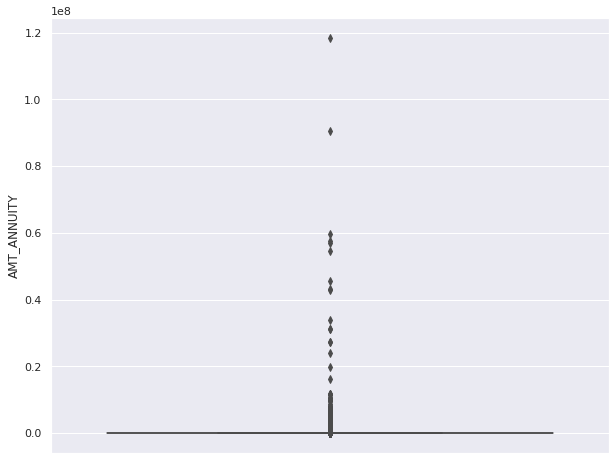

In [149]:
# BoxPlot
plt.figure(figsize=(10,8))
sns.boxplot(y = bureau_data["AMT_ANNUITY"])
plt.show()

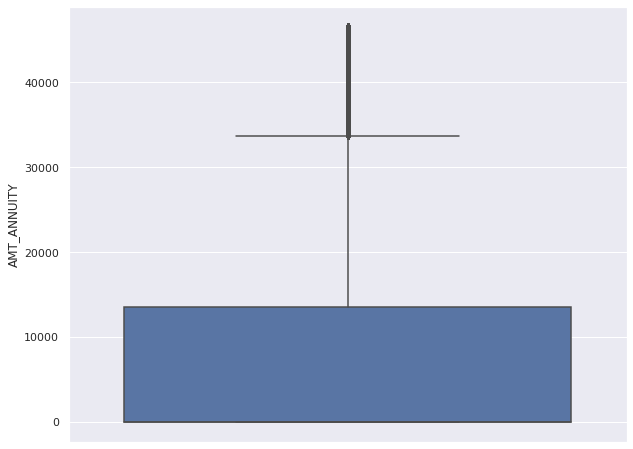

In [150]:
# There are outlier present in the AMT_ANNUITY
# LET's cap the value to 95 percentile = 46571.4
bureau_data["AMT_ANNUITY"]= bureau_data["AMT_ANNUITY"].clip(bureau_data["AMT_ANNUITY"].min(), 46571.4)
plt.figure(figsize=(10,8))
sns.boxplot(y = bureau_data["AMT_ANNUITY"])
plt.show()

In [151]:
# 71% values are missing and in rest 60 values are 0. So dropping the columns
bureau_data= bureau_data.drop("AMT_ANNUITY", axis =1)

In [152]:
bureau_data["CREDIT_CURRENCY"].value_counts()

currency 1    1715020
currency 2       1224
currency 3        174
currency 4         10
Name: CREDIT_CURRENCY, dtype: int64

In [153]:
#99% of the data is for currency 1.
# Drop the variable due to lack of variance
bureau_data = bureau_data.drop("CREDIT_CURRENCY", axis =1)

In [154]:
bureau_data[bureau_data["SK_ID_CURR"]==380361]

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,total_payment_default,max_default_days
768,380361,5715448,Active,-820,0,31069.0,NaN,NaN,0,67500.0,0.0,67500.0,0.0,Credit card,-183,0.0,0.0
769,380361,5715449,Active,-357,0,1119.0,NaN,NaN,0,45000.0,0.0,45000.0,0.0,Credit card,-130,0.0,0.0
770,380361,5715451,Closed,-917,0,-187.0,-759.0,NaN,0,74439.0,0.0,0.0,0.0,Consumer credit,-748,0.0,0.0
771,380361,5715452,Closed,-993,0,31039.0,-831.0,NaN,0,315000.0,0.0,0.0,0.0,Credit card,-818,0.0,0.0
772,380361,5715453,Closed,-1146,0,681.0,-780.0,NaN,0,2025000.0,0.0,0.0,0.0,Consumer credit,-769,0.0,0.0
773,380361,5715454,Closed,-1622,0,-1074.0,-1073.0,NaN,0,540000.0,0.0,0.0,0.0,Consumer credit,-1006,0.0,0.0
774,380361,5715455,Closed,-2631,0,-804.0,-1096.0,NaN,0,2205000.0,0.0,0.0,0.0,Car loan,-944,0.0,0.0
775,380361,5715456,Closed,-1449,0,-1084.0,-1267.0,NaN,0,60480.0,0.0,0.0,0.0,Consumer credit,-1259,0.0,0.0
776,380361,5715457,Active,-222,0,874.0,NaN,NaN,0,202500.0,31594.5,0.0,0.0,Credit card,-18,0.0,0.0
777,380361,5715458,Closed,-749,0,-111.0,-110.0,NaN,0,1267843.5,0.0,NaN,0.0,Consumer credit,-110,0.0,0.0


In [155]:
bureau_data[bureau_data["SK_ID_CURR"]==215354]

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,total_payment_default,max_default_days
0,215354,5714462,Closed,-497,0,-153.0,-153.0,NaN,0,91323.0,0.00,NaN,0.0,Consumer credit,-131,0.0,0.0
1,215354,5714463,Active,-208,0,1075.0,NaN,NaN,0,225000.0,171342.00,NaN,0.0,Credit card,-20,0.0,0.0
2,215354,5714464,Active,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,0.0,0.0
3,215354,5714465,Active,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,0.0,0.0
4,215354,5714466,Active,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,0.0,0.0
5,215354,5714467,Active,-273,0,27460.0,NaN,0.0,0,180000.0,71017.38,108982.62,0.0,Credit card,-31,0.0,0.0
6,215354,5714468,Active,-43,0,79.0,NaN,0.0,0,42103.8,42103.80,0.00,0.0,Consumer credit,-22,0.0,0.0
225157,215354,5714458,Closed,-1872,0,-776.0,-1203.0,NaN,0,494550.0,0.00,0.00,0.0,Consumer credit,-696,0.0,0.0
225158,215354,5714459,Closed,-1734,0,-638.0,-1336.0,NaN,0,1084032.0,0.00,NaN,0.0,Car loan,-1336,0.0,0.0
225159,215354,5714460,Closed,-1333,0,-1089.0,-987.0,NaN,0,102150.0,NaN,NaN,0.0,Consumer credit,-984,0.0,0.0


In [156]:
#DAYS_CREDIT	How many days before current application did client apply for Credit Bureau credit
#DAYS_CREDIT_ENDDATE	Remaining duration of CB credit (in days) at the time of application in Home Credit
#DAYS_ENDDATE_FACT	Days since CB credit ended at the time of application in Home Credit (only for closed credit)


# CREATE A NEW FEATURE TENURE = DAYS_CREDIT_ENDDATE - DAYS_CREDIT 
# CLOSED_TENURE = DAYS_CREDIT - DAYS_ENDDATE_FACT
# DAYS_CREDIT_ENDDATE - DAYS_CREDIT FOR ACTIVE 


In [157]:
bureau_data['LOAN_TENURE'] =  bureau_data['DAYS_CREDIT_ENDDATE'] - bureau_data['DAYS_CREDIT']

In [158]:
bureau_data['CLOSED_SINCE'] =  bureau_data['DAYS_ENDDATE_FACT'] - bureau_data['DAYS_CREDIT']

In [159]:
bureau_data.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,total_payment_default,max_default_days,LOAN_TENURE,CLOSED_SINCE
0,215354,5714462,Closed,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,0.0,0.0,344.0,344.0
1,215354,5714463,Active,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,0.0,0.0,1283.0,NaN
2,215354,5714464,Active,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,0.0,0.0,731.0,NaN
3,215354,5714465,Active,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,0.0,0.0,NaN,NaN
4,215354,5714466,Active,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,0.0,0.0,1826.0,NaN


In [160]:
# Drop the original columns # DAYS_CREDIT, DAYS_CREDIT_ENDDATE, DAYS_ENDDATE_FACT

bureau_data= bureau_data.drop(['DAYS_CREDIT', 'DAYS_CREDIT_ENDDATE', 'DAYS_ENDDATE_FACT'], axis=1)

In [161]:
bureau_data.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_DAY_OVERDUE,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,total_payment_default,max_default_days,LOAN_TENURE,CLOSED_SINCE
0,215354,5714462,Closed,0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,0.0,0.0,344.0,344.0
1,215354,5714463,Active,0,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,0.0,0.0,1283.0,NaN
2,215354,5714464,Active,0,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,0.0,0.0,731.0,NaN
3,215354,5714465,Active,0,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,0.0,0.0,NaN,NaN
4,215354,5714466,Active,0,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,0.0,0.0,1826.0,NaN


In [162]:
bureau_data["CREDIT_DAY_OVERDUE"].describe([0.1, 0.2, 0.3, 0.7, 0.9, 0.95, 0.99])

count    1.716428e+06
mean     8.181666e-01
std      3.654443e+01
min      0.000000e+00
10%      0.000000e+00
20%      0.000000e+00
30%      0.000000e+00
50%      0.000000e+00
70%      0.000000e+00
90%      0.000000e+00
95%      0.000000e+00
99%      0.000000e+00
max      2.792000e+03
Name: CREDIT_DAY_OVERDUE, dtype: float64

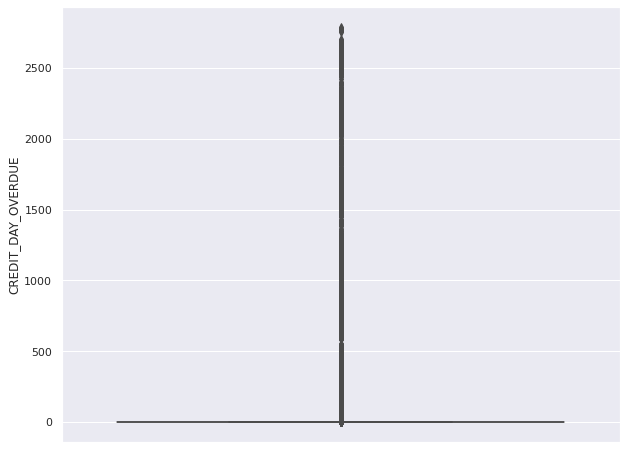

In [163]:
#CREDIT_DAY_OVERDUE
plt.figure(figsize=(10,8))
sns.boxplot(y = bureau_data["CREDIT_DAY_OVERDUE"])
plt.show()

In [164]:
# Only 4217 - less than 1% have the value.. so dropping this columns
bureau_data[bureau_data["CREDIT_DAY_OVERDUE"] != 0].shape

(4217, 16)

In [165]:
bureau_data= bureau_data.drop("CREDIT_DAY_OVERDUE", axis =1)

In [166]:
bureau_data[bureau_data["AMT_CREDIT_MAX_OVERDUE"] != 0].shape

(1245778, 15)

In [167]:
bureau_data["AMT_CREDIT_MAX_OVERDUE"].describe([0.1, 0.2, 0.3, 0.7, 0.9, 0.95, 0.99])

count    5.919400e+05
mean     3.825418e+03
std      2.060316e+05
min      0.000000e+00
10%      0.000000e+00
20%      0.000000e+00
30%      0.000000e+00
50%      0.000000e+00
70%      0.000000e+00
90%      7.594875e+03
95%      1.422045e+04
99%      4.198875e+04
max      1.159872e+08
Name: AMT_CREDIT_MAX_OVERDUE, dtype: float64

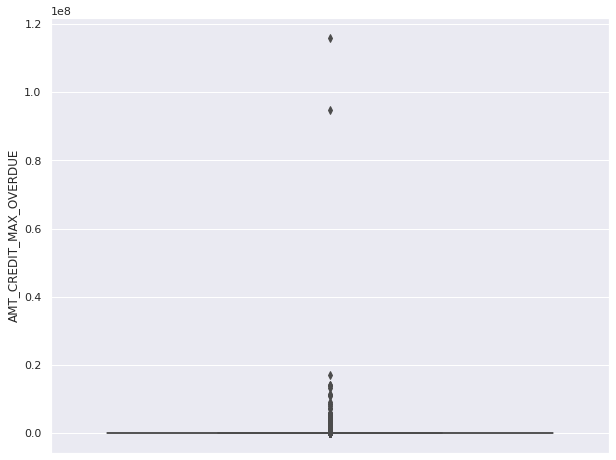

In [168]:
plt.figure(figsize=(10,8))
sns.boxplot(y = bureau_data["AMT_CREDIT_MAX_OVERDUE"])
plt.show()

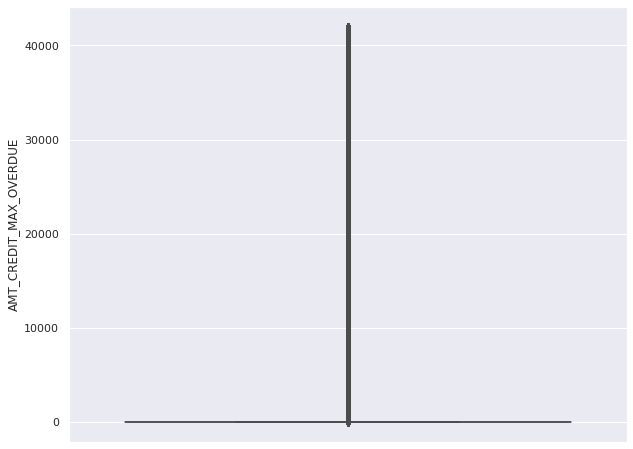

In [169]:
# There are outlier present in the AMT_ANNUITY
# LET's cap the value to 95 percentile = 46571.4
bureau_data["AMT_CREDIT_MAX_OVERDUE"]= bureau_data["AMT_CREDIT_MAX_OVERDUE"].clip(bureau_data["AMT_CREDIT_MAX_OVERDUE"].min(), 41988.75)
plt.figure(figsize=(10,8))
sns.boxplot(y = bureau_data["AMT_CREDIT_MAX_OVERDUE"])
plt.show()

In [170]:
# More than 70% value is 0. #dropping this columns
bureau_data= bureau_data.drop("AMT_CREDIT_MAX_OVERDUE", axis =1)

In [171]:
bureau_data.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,total_payment_default,max_default_days,LOAN_TENURE,CLOSED_SINCE
0,215354,5714462,Closed,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,0.0,0.0,344.0,344.0
1,215354,5714463,Active,0,225000.0,171342.0,NaN,0.0,Credit card,-20,0.0,0.0,1283.0,NaN
2,215354,5714464,Active,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,0.0,0.0,731.0,NaN
3,215354,5714465,Active,0,90000.0,NaN,NaN,0.0,Credit card,-16,0.0,0.0,NaN,NaN
4,215354,5714466,Active,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,0.0,0.0,1826.0,NaN


In [172]:
bureau_data["AMT_CREDIT_SUM_OVERDUE"].describe([0.1, 0.2, 0.3, 0.7,0.8, 0.9, 0.95, 0.99])

count    1.716428e+06
mean     3.791276e+01
std      5.937650e+03
min      0.000000e+00
10%      0.000000e+00
20%      0.000000e+00
30%      0.000000e+00
50%      0.000000e+00
70%      0.000000e+00
80%      0.000000e+00
90%      0.000000e+00
95%      0.000000e+00
99%      0.000000e+00
max      3.756681e+06
Name: AMT_CREDIT_SUM_OVERDUE, dtype: float64

In [173]:
# More than 80% value is 0. #dropping this columns
bureau_data= bureau_data.drop("AMT_CREDIT_SUM_OVERDUE", axis =1)

In [174]:
bureau_data["CLOSED_BEFORE_MATURITY"] =  bureau_data['LOAN_TENURE'] > bureau_data["CLOSED_SINCE"] 
                                                          

In [179]:
# Group by SK_ID_CURR for summary of their bureau and bureau balance
def get_aggrigate_values(customer_data):
    
    total_loan = customer_data.shape[0]
    closed_sum = customer_data[customer_data["CREDIT_ACTIVE"] == "Closed"].shape[0]
    active_sum = customer_data[customer_data["CREDIT_ACTIVE"] == "Active"].shape[0]
    sold_sum = customer_data[customer_data["CREDIT_ACTIVE"] == "Sold"].shape[0]
    bad_debt = customer_data[customer_data["CREDIT_ACTIVE"] == "Bad debt"].shape[0]
    
    consumer_loan = customer_data[customer_data["CREDIT_TYPE"] == "Consumer credit"].shape[0]
    credit_card = customer_data[customer_data["CREDIT_TYPE"] == "Credit card"].shape[0]
    car_loan = customer_data[customer_data["CREDIT_TYPE"] == "Car loan"].shape[0]
    mortgage_loan = customer_data[customer_data["CREDIT_TYPE"] == "Mortgage"].shape[0]
    micro_loan = customer_data[customer_data["CREDIT_TYPE"] == "Microloan"].shape[0]
    business_loan= customer_data[customer_data["CREDIT_TYPE"].isin(["Loan for business development","Loan for the purchase of equipment"])].shape[0]
    other = total_loan - (consumer_loan + credit_card + car_loan + mortgage_loan + micro_loan + business_loan)
    
    max_credit_prolong = max(customer_data['CNT_CREDIT_PROLONG'])
    min_credit_prolong = min(customer_data['CNT_CREDIT_PROLONG'])
    avg_credit_prolong = customer_data['CNT_CREDIT_PROLONG'].mean()
    
    max_loan_tenure = max(customer_data['LOAN_TENURE'])
    min_loan_tenure = min(customer_data['LOAN_TENURE'])
    avg_loan_tenure = customer_data['LOAN_TENURE'].mean()
    distinct_loan_payment_default = customer_data[customer_data['total_payment_default']>0].shape[0]
    max_loan_payment_default_days = max(customer_data['max_default_days'])
    
    closed_before_maturity = sum(customer_data['CLOSED_BEFORE_MATURITY'])

    

    return total_loan, closed_sum, active_sum, sold_sum, bad_debt, consumer_loan, credit_card, car_loan, mortgage_loan,\
            micro_loan, business_loan, other,  max_credit_prolong, min_credit_prolong, avg_credit_prolong,\
            max_loan_tenure, min_loan_tenure,avg_loan_tenure, closed_before_maturity,distinct_loan_payment_default,\
            max_loan_payment_default_days
            
                                                        

groupdf_df = bureau_data.groupby("SK_ID_CURR", sort=False).apply(
    lambda ser: get_aggrigate_values(ser)
)

In [180]:
groupdf_df.head()

SK_ID_CURR
215354    (11, 5, 6, 0, 0, 7, 3, 1, 0, 0, 0, 0, 0, 0, 0....
162297    (6, 3, 3, 0, 0, 3, 2, 0, 1, 0, 0, 0, 0, 0, 0.0...
402440    (1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0.0...
238881    (8, 5, 3, 0, 0, 5, 3, 0, 0, 0, 0, 0, 0, 0, 0.0...
222183    (8, 3, 5, 0, 0, 4, 3, 1, 0, 0, 0, 0, 0, 0, 0.0...
dtype: object

In [181]:
groupdf_df = groupdf_df.reset_index()

In [182]:
groupdf_df.columns

Index(['SK_ID_CURR', 0], dtype='object')

In [183]:
groupdf_df[['total_loan', 'nbr_closed_sum', 'nbr_active_sum', 'nbr_sold_sum', 'nbr_bad_debt', 'consumer_loan', 'credit_card', 'car_loan', 'mortgage_loan',
            'micro_loan', 'business_loan', 'other_loan_count',  'max_credit_prolong', 'min_credit_prolong', 'avg_credit_prolong',
            'max_loan_tenure', 'min_loan_tenure','avg_loan_tenure', 'closed_before_maturity', 'distinct_loan_payment_default', 'max_loan_payment_default_days']] = pd.DataFrame(groupdf_df[0].tolist(), index=groupdf_df.index)   

In [184]:
groupdf_df = groupdf_df.drop(0, axis =1)

In [185]:
groupdf_df.head()

,SK_ID_CURR,total_loan,nbr_closed_sum,nbr_active_sum,nbr_sold_sum,nbr_bad_debt,consumer_loan,credit_card,car_loan,mortgage_loan,micro_loan,business_loan,other_loan_count,max_credit_prolong,min_credit_prolong,avg_credit_prolong,max_loan_tenure,min_loan_tenure,avg_loan_tenure,closed_before_maturity,distinct_loan_payment_default,max_loan_payment_default_days
0,215354,11,5,6,0,0,7,3,1,0,0,0,0,0,0,0.0,27733.0,122.0,3465.600000,2,0,0.0
1,162297,6,3,3,0,0,3,2,0,1,0,0,0,0,0,0.0,5538.0,212.0,1590.000000,3,0,0.0
2,402440,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0.0,365.0,365.0,365.000000,0,0,0.0
3,238881,8,5,3,0,0,5,3,0,0,0,0,0,0,0,0.0,1815.0,131.0,569.666667,0,0,0.0
4,222183,8,3,5,0,0,4,3,1,0,0,0,0,0,0,0.0,1827.0,183.0,1286.750000,1,0,0.0


In [186]:
groupdf_df.shape

(305811, 22)

In [187]:
groupdf_df.to_csv("Bureau_group.csv", index= False)

In [188]:
bureau_data[bureau_data["SK_ID_CURR"]==215354]

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,CREDIT_TYPE,DAYS_CREDIT_UPDATE,total_payment_default,max_default_days,LOAN_TENURE,CLOSED_SINCE,CLOSED_BEFORE_MATURITY
0,215354,5714462,Closed,0,91323.0,0.00,NaN,Consumer credit,-131,0.0,0.0,344.0,344.0,False
1,215354,5714463,Active,0,225000.0,171342.00,NaN,Credit card,-20,0.0,0.0,1283.0,NaN,False
2,215354,5714464,Active,0,464323.5,NaN,NaN,Consumer credit,-16,0.0,0.0,731.0,NaN,False
3,215354,5714465,Active,0,90000.0,NaN,NaN,Credit card,-16,0.0,0.0,NaN,NaN,False
4,215354,5714466,Active,0,2700000.0,NaN,NaN,Consumer credit,-21,0.0,0.0,1826.0,NaN,False
5,215354,5714467,Active,0,180000.0,71017.38,108982.62,Credit card,-31,0.0,0.0,27733.0,NaN,False
6,215354,5714468,Active,0,42103.8,42103.80,0.00,Consumer credit,-22,0.0,0.0,122.0,NaN,False
225157,215354,5714458,Closed,0,494550.0,0.00,0.00,Consumer credit,-696,0.0,0.0,1096.0,669.0,True
225158,215354,5714459,Closed,0,1084032.0,0.00,NaN,Car loan,-1336,0.0,0.0,1096.0,398.0,True
225159,215354,5714460,Closed,0,102150.0,NaN,NaN,Consumer credit,-984,0.0,0.0,244.0,346.0,False


In [189]:
missing(groupdf_df)

min_loan_tenure                  2.70
max_loan_tenure                  2.70
avg_loan_tenure                  0.85
max_loan_payment_default_days    0.00
car_loan                         0.00
total_loan                       0.00
nbr_closed_sum                   0.00
nbr_active_sum                   0.00
nbr_sold_sum                     0.00
nbr_bad_debt                     0.00
consumer_loan                    0.00
credit_card                      0.00
micro_loan                       0.00
mortgage_loan                    0.00
distinct_loan_payment_default    0.00
business_loan                    0.00
other_loan_count                 0.00
max_credit_prolong               0.00
min_credit_prolong               0.00
avg_credit_prolong               0.00
closed_before_maturity           0.00
SK_ID_CURR                       0.00
dtype: float64


In [191]:
groupdf_df.head(10)

,SK_ID_CURR,total_loan,nbr_closed_sum,nbr_active_sum,nbr_sold_sum,nbr_bad_debt,consumer_loan,credit_card,car_loan,mortgage_loan,micro_loan,business_loan,other_loan_count,max_credit_prolong,min_credit_prolong,avg_credit_prolong,max_loan_tenure,min_loan_tenure,avg_loan_tenure,closed_before_maturity,distinct_loan_payment_default,max_loan_payment_default_days
0,215354,11,5,6,0,0,7,3,1,0,0,0,0,0,0,0.0,27733.0,122.0,3465.600000,2,0,0.0
1,162297,6,3,3,0,0,3,2,0,1,0,0,0,0,0,0.0,5538.0,212.0,1590.000000,3,0,0.0
2,402440,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0.0,365.0,365.0,365.000000,0,0,0.0
3,238881,8,5,3,0,0,5,3,0,0,0,0,0,0,0,0.0,1815.0,131.0,569.666667,0,0,0.0
4,222183,8,3,5,0,0,4,3,1,0,0,0,0,0,0,0.0,1827.0,183.0,1286.750000,1,0,0.0
5,426155,4,4,0,0,0,4,0,0,0,0,0,0,0,0,0.0,365.0,182.0,267.500000,1,0,0.0
6,136226,2,1,1,0,0,0,2,0,0,0,0,0,0,0,0.0,1072.0,1072.0,1072.000000,0,0,0.0
7,400486,6,4,2,0,0,5,1,0,0,0,0,0,0,0,0.0,1096.0,365.0,732.333333,2,0,0.0
8,435112,12,9,3,0,0,11,1,0,0,0,0,0,0,0,0.0,1826.0,182.0,669.363636,2,0,0.0
9,452585,5,3,2,0,0,4,1,0,0,0,0,0,0,0,0.0,1111.0,16.0,330.800000,2,0,0.0
